In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns

from sklearn.cluster import KMeans

In [52]:
data = pd.read_excel('pydata02_1678066030739.xlsx')
data.head

<bound method NDFrame.head of                      日期  大气温度  气象站气压  相对湿度  类别
0   2022-02-28 23:00:00  13.9  719.6    40   1
1   2022-02-28 20:00:00  13.4  716.0    47   2
2   2022-02-28 17:00:00  16.6  713.7    27   3
3   2022-02-28 14:00:00  16.9  714.1    33   1
4   2022-02-28 11:00:00  12.2  716.1    67   3
..                  ...   ...    ...   ...  ..
219 2022-02-01 14:00:00   6.4  717.7    79   2
220 2022-02-01 11:00:00   5.7  719.5    82   3
221 2022-02-01 08:00:00   4.6  718.2    91   1
222 2022-02-01 05:00:00   4.9  717.8    83   1
223 2022-02-01 02:00:00   5.3  718.9    77   2

[224 rows x 5 columns]>

In [61]:
data.isna().astype(int).sum()

日期       0
大气温度     0
气象站气压    0
相对湿度     0
类别       0
dtype: int64

**Q1 第1四分位数**是描述数据的一个重要统计量。  
可以使用numpy或pandas轻松计算它。   
箱线图（Boxplot）能直观展示四分位数及数据分布。  

In [64]:
type_2 = data[(data['类别'] == 2)]
type_2.describe().T

,count,mean,min,25%,50%,75%,max,std
日期,82,2022-02-13 19:46:49.756097536,2022-02-01 02:00:00,2022-02-06 15:30:00,2022-02-13 23:00:00,2022-02-19 23:45:00,2022-02-28 20:00:00,NaN
大气温度,82.0,6.69878,1.1,4.5,6.15,8.275,16.5,3.241989
气象站气压,82.0,718.309756,708.7,716.25,718.1,720.8,725.4,3.39846
相对湿度,82.0,79.292683,33.0,70.25,83.5,93.0,98.0,16.340125
类别,82.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0


In [23]:
round(type_2['相对湿度'].mean(), 6)

79.292683

In [32]:
data.iloc[0]['日期']

Timestamp('2022-02-28 23:00:00')

In [33]:
pd.to_datetime(data.iloc[-1]['日期']) - pd.to_datetime(data.iloc[0]['日期'])

Timedelta('-28 days +03:00:00')

In [35]:
data_day_rank = data.sort_values('日期')
data_day_rank

,日期,大气温度,气象站气压,相对湿度,类别
223,2022-02-01 02:00:00,5.3,718.9,77,2
222,2022-02-01 05:00:00,4.9,717.8,83,1
221,2022-02-01 08:00:00,4.6,718.2,91,1
220,2022-02-01 11:00:00,5.7,719.5,82,3
219,2022-02-01 14:00:00,6.4,717.7,79,2
...,...,...,...,...,...
4,2022-02-28 11:00:00,12.2,716.1,67,3
3,2022-02-28 14:00:00,16.9,714.1,33,1
2,2022-02-28 17:00:00,16.6,713.7,27,3
1,2022-02-28 20:00:00,13.4,716.0,47,2


In [39]:
data_first_10 = data_day_rank.iloc[:10]
data_first_10

,日期,大气温度,气象站气压,相对湿度,类别
223,2022-02-01 02:00:00,5.3,718.9,77,2
222,2022-02-01 05:00:00,4.9,717.8,83,1
221,2022-02-01 08:00:00,4.6,718.2,91,1
220,2022-02-01 11:00:00,5.7,719.5,82,3
219,2022-02-01 14:00:00,6.4,717.7,79,2
218,2022-02-01 17:00:00,6.2,717.4,82,2
217,2022-02-01 20:00:00,5.2,719.5,90,3
216,2022-02-01 23:00:00,4.5,721.4,93,2
215,2022-02-02 02:00:00,4.5,721.5,95,2
214,2022-02-02 05:00:00,3.6,721.1,93,1


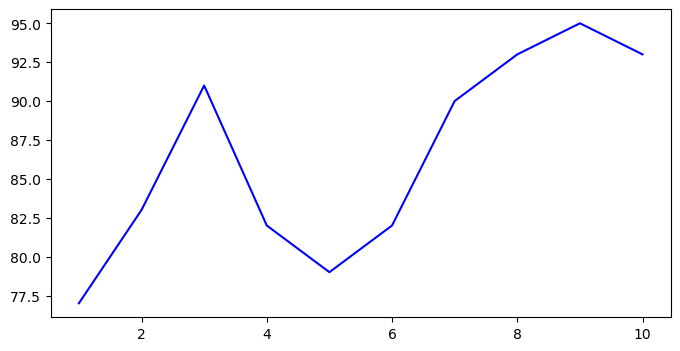

In [41]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11, 1), data_first_10['相对湿度'], c='b')
plt.show()

In [47]:
data_to_dum = data[['大气温度', '气象站气压', '相对湿度']]
data_to_dum

,大气温度,气象站气压,相对湿度
0,13.9,719.6,40
1,13.4,716.0,47
2,16.6,713.7,27
3,16.9,714.1,33
4,12.2,716.1,67
...,...,...,...
219,6.4,717.7,79
220,5.7,719.5,82
221,4.6,718.2,91
222,4.9,717.8,83


In [48]:
kmodel = KMeans(n_clusters=4, random_state=0)
kmodel.fit(data_to_dum)

D:\Anaconda3\envs\big-data\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

C:\Users\杜苏苏\AppData\Local\Temp\ipykernel_14316\1151379875.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_dum['Cluster'] = labels
D:\Anaconda3\envs\big-data\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27668 (\N{CJK UNIFIED IDEOGRAPH-6C14}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\envs\big-data\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35937 (\N{CJK UNIFIED IDEOGRAPH-8C61}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\envs\big-data\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31449 (\N{CJK UNIFIED IDEOGRAPH-7AD9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

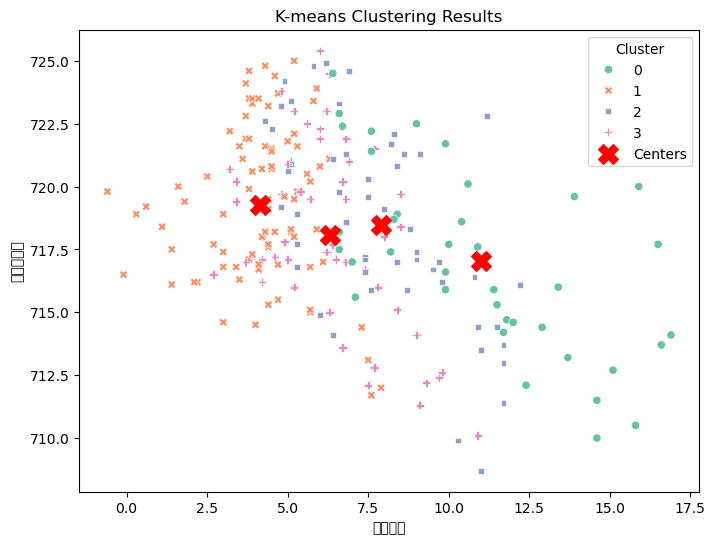

In [51]:
# 获取聚类标签和中心点
labels = kmodel.labels_
cluster_centers = kmodel.cluster_centers_
 
# 将聚类标签添加到原始数据中
data_to_dum['Cluster'] = labels

# 绘制散点图，只展示前两个特征（X轴和Y轴）
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_to_dum, x=data_to_dum.columns[0], y=data_to_dum.columns[1], 
                hue='Cluster', palette='Set2', style='Cluster', markers=True)

# 绘制聚类中心
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X', label='Centers')

plt.title('K-means Clustering Results')
plt.legend(title='Cluster')
plt.show()